#**Fashion MNIST**

We will continue working on the Fashion MNIST dataset in this application and try to find out how CNNs are employed with image data.

**Note:** we will create a very simple model here and will only talk about the architecture with limited features. Please feel free to add/modify the architecture as per your understanding.

## **Loading the libraries and the dataset**

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
(X_train, trainY), (X_test,testY) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape, trainY.shape, X_test.shape, testY.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

**Let's visualize the dataset**

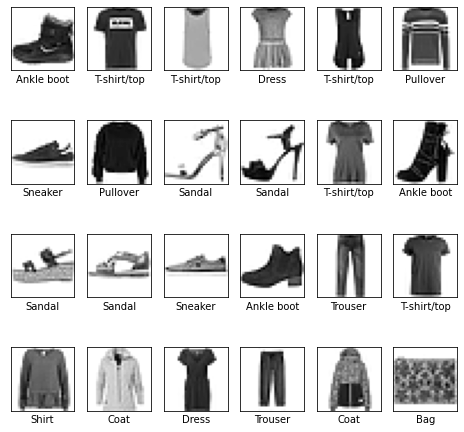

In [3]:
# Let's visualize the dataset at hand
import matplotlib.pyplot as plt
class_names_list = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8,8))
for i in range(24):
    plt.subplot(4,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_list[trainY[i]])
plt.show()

##**Data Preprocessing**

In [4]:
# Reshaping the training and the testing data. 
# This needs to be reshaped because of the input shape requirement of the CNN
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28,1)

In [5]:
# Let's normalize the dataset. Since there are pixel values ranging from 0-255, lets divide by 255 to get the new ranges from 0-1
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# Also we will create one hot encoded vectors for the target variable
y_train = tf.keras.utils.to_categorical(trainY)
y_test = tf.keras.utils.to_categorical(testY)

## **Model Building**

In [6]:
# Imporing the libraries as required. Note that we are using tensorflow.keras here.
import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam

## **Model-1**

**### Question 1 : In CNN last few layers are fully connected layers. So for model1 after flatten, add 1 hidden layer with 64 neurons, a relu activation function, and an output layer. Then build the model and the test accuracy of the model lies in the range,**

In [13]:
# Initiating the sequential model object
model1 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model1.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model1.add(Flatten())
model1.add(Dense(units = 64, activation = 'relu'))# Write Code for hidden layer 
model1.add(Dense(units = y_train.shape[1], activation = 'softmax'))# Write code for output layer

### **Question 2: So how many parameters does the Max pooling layer take? (check model summary)**

In [14]:
# Let us summarize the model structure
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                200768    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 201,578
Trainable params: 201,578
Non-trainable params: 0
__________________________________________________

### **Compiling, fitting and evaluating the test set prediction**

In [15]:
# Optimizer for the model, Adam with a learning rate (lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model1.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
# Fitting the model with a batch size of 128 and 10 epochs.
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 29s 60ms/step - loss: 2.9567 - accuracy: 0.8062 - val_loss: 0.4409 - val_accuracy: 0.8394
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3699 - accuracy: 0.8650 - val_loss: 0.4004 - val_accuracy: 0.8608
Epoch 3/10
469/469 [==============================] - 20s 43ms/step - loss: 0.3365 - accuracy: 0.8752 - val_loss: 0.4066 - val_accuracy: 0.8586
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.3173 - accuracy: 0.8817 - val_loss: 0.3980 - val_accuracy: 0.8639
Epoch 5/10
469/469 [==============================] - 22s 48ms/step - loss: 0.3018 - accuracy: 0.8862 - val_loss: 0.3834 - val_accuracy: 0.8659
Epoch 6/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2913 - accuracy: 0.8896 - val_loss: 0.3805 - val_accuracy: 0.8676
Epoch 7/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2885 - accuracy: 0.8914 - val_loss: 0.3945 - val_accuracy:

In [55]:
def plot_loss_acc(data):
  nrows=1
  ncols=2

  cols = list(data.history.keys())

  fig, ax = plt.subplots(nrows,ncols,figsize = (15,6))

  for i in range(0,ncols):
    ax[i].plot(data.history[cols[i]], label = "Train")
    ax[i].plot(data.history[cols[i+2]], label = "Validation")
    ax[i].set_title('Model '+cols[i])
    ax[i].set_ylabel(cols[i])
    ax[i].set_xlabel('Epoch')
    ax[i].legend(['train', 'validation'], loc='best')
  
  return plt.show()

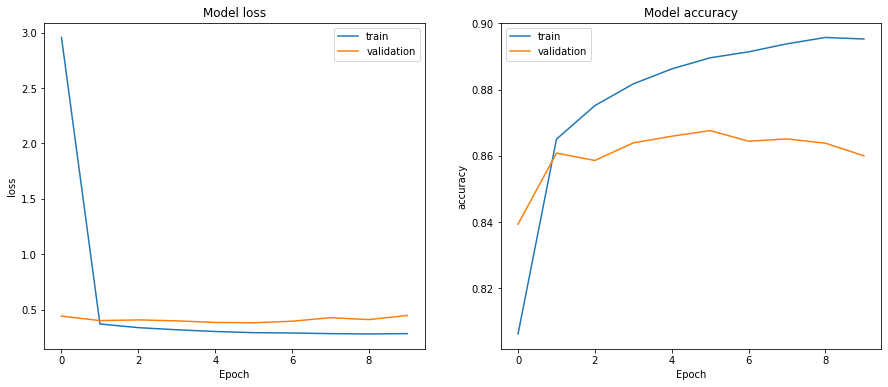

In [56]:
plot_loss_acc(history)

### **Evaluate the model on the test set**

- Let's predict using the test data. 
- The .predict() method in Keras models returns the probabilities of each observation belonging to each class. We will choose the class where the predicted probability is the highest.
- Also, let's build a function to print the classification report and confusion matrix.

In [17]:
def metrics_score(actual, predicted):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels=class_names_list, yticklabels=class_names_list)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      1000
           1       0.97      0.97      0.97      1000
           2       0.81      0.70      0.75      1000
           3       0.82      0.90      0.86      1000
           4       0.75      0.77      0.76      1000
           5       0.97      0.95      0.96      1000
           6       0.61      0.70      0.65      1000
           7       0.91      0.99      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



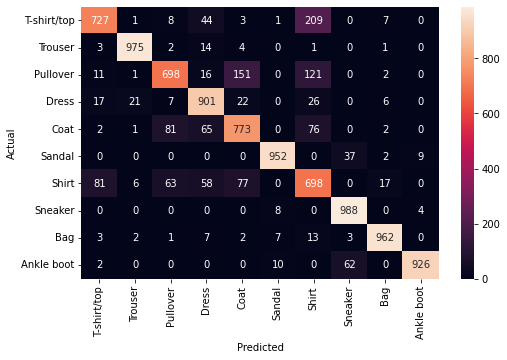

In [18]:
test_pred1 = np.argmax(model1.predict(x_test), axis=-1)

metrics_score(testY, test_pred1)

## **Model-2**

### **Question 3: In model1 you have only one convolution layer, to increase the performance build model2 with 2 convolution layers. One layer has been already implemented for you just add another layer with a number of filters, kernel_size, activation, and padding same as previous layers.**
- Note: Do not pass the input_shape parameter for other convolution layers. It should only be used in the first convolution layer.


In [60]:
# Initiating the sequential model object
model2 = Sequential()

# Generating the model and adding layers
# Two convolution layers and pooling layer
model2.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', data_format='channels_last', input_shape=(28,28,1)))
model2.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')) # Add convolutional layer also not pass the input_shape parameter in this layer
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the model and making room for the fully connected component
model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(16, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(y_train.shape[1], activation='softmax')) # Add output layer details

In [61]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                200768    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                        

### **Observations**
- The model structure has:
    - 2 convolution layers with 16 filters each of size (3,3) and 'same' padding i.e. the output would be of the same size as the input except the depth which would be equal to 16.
    - Max pooling of size (2,2) is applied to the output of the second layer.
    - The output of max pooled images is flattened using the Flatten layer.
    - A Dense layer is used to create a fully connected layer with 64 nodes and has been applied to the output of the Flatten layer.
    - A batch normalization layer to normalize each batch while training the model i.e. centering and scaling each batch separately. It helps to make the training process faster, and reduce overfitting so that the model can generalize appropriately.
    - Again, a Dense layer with 16 nodes and a batch normalization layer.
    - Finally, the softmax layer with 10 nodes to get the probabilities of each observation belonging to each class.

- Each node in the batch normalization layer has two non-trainable parameters - mean and variance. Here, we have 2 batch normalization layers with 64 and 16 nodes. So, the model has (64+16)*2 = 160 non-trainable parameters.

In [62]:
# Optimizer for the model, Adam with a learning rate(lr) of 0.01.
optimizer = Adam(learning_rate=0.01)

# Compile the model with the optimizer, loss (categorical_crossentropy) and the metrics (accuracy) to look at.
model2.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [64]:
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), verbose = 1, batch_size=128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1760 - accuracy: 0.9345 - val_loss: 0.2727 - val_accuracy: 0.9097
Epoch 2/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1584 - accuracy: 0.9415 - val_loss: 0.2609 - val_accuracy: 0.9127
Epoch 3/10
469/469 [==============================] - 65s 140ms/step - loss: 0.1455 - accuracy: 0.9459 - val_loss: 0.2637 - val_accuracy: 0.9109
Epoch 4/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1285 - accuracy: 0.9529 - val_loss: 0.2787 - val_accuracy: 0.9095
Epoch 5/10
469/469 [==============================] - 64s 137ms/step - loss: 0.1168 - accuracy: 0.9573 - val_loss: 0.2847 - val_accuracy: 0.9112
Epoch 6/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1057 - accuracy: 0.9615 - val_loss: 0.2816 - val_accuracy: 0.9155
Epoch 7/10
469/469 [==============================] - 64s 137ms/step - loss: 0.0941 - accuracy: 0.9651 - val_loss: 0.2972 - val_ac

313/313 [==============================] - 4s 12ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.89      0.86      1000
           3       0.88      0.94      0.91      1000
           4       0.87      0.84      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



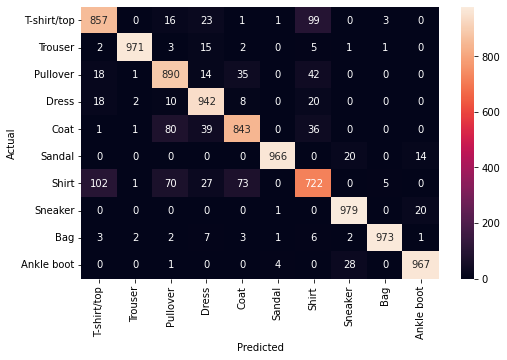

In [65]:
test_pred2 = np.argmax(model2.predict(x_test), axis=-1)

metrics_score(testY, test_pred2)

- There is a hint of overfitting in the modeling process. We can use regularization, dropout, batch normalization, and data augmentation to handle it. Feel free to apply these techniques to this dataset.

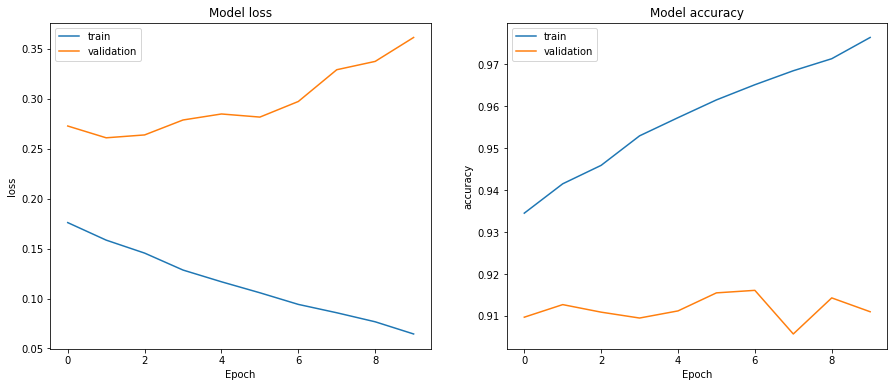

In [66]:
plot_loss_acc(history2)

**Let's visualize the images from the test data.** 
- We will randomly select 24 images from the test data and visualize them.
- The title of each image would show the actual and predicted label of that image and the probability of the predicted class. 
- Higher the probability more confident the model is about the prediction.

313/313 [==============================] - 4s 12ms/step


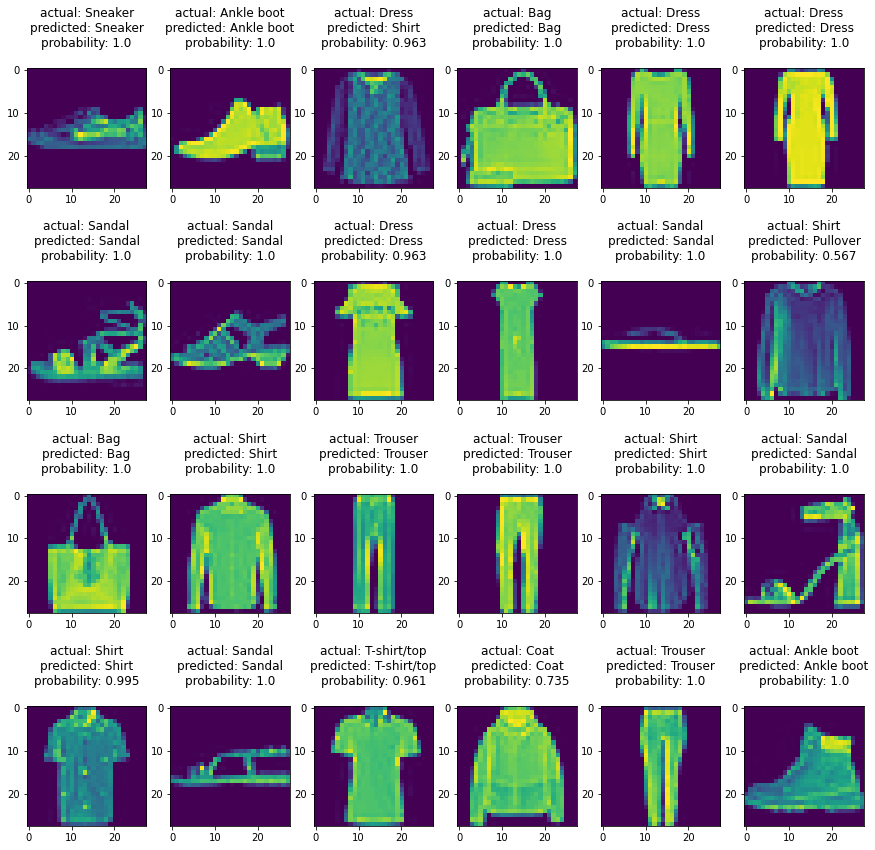

In [67]:
rows = 4
cols = 6
fig = plt.figure(figsize=(15, 15))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(testY))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.imshow(X_test[random_index, :])
        pred_label = class_names_list[test_pred2[random_index]]
        true_label = class_names_list[testY[random_index]]
        y_pred_test_max_probas = np.max(model2.predict(x_test), axis=-1)
        pred_proba = y_pred_test_max_probas[random_index]
        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

### **Comments**
 - To avoid overfitting, we can try out dropout layers.
- Note the shape of the training and the testing data for the fitting process. Data should be properly shaped when sending in volumes in the first layer.
- To get better accuracies, one can try to add more convolutional filters and more convolutional and dense layers. However, adding more nodes also increases the time required to fit the model and hence there is a trade-off.
 - In such a case, batch normalization comes in handy. It can speed up the training process.

### **Recommendations**
 - Play around with hyperparameters and see if you can improve the accuracy.
 - Try out different optimizers and assess their effectiveness.
 - Also, try out the initializers to check their effect on the model building process.